In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('C:/Users/H P/Downloads/archive/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Performing data checks such as
1. Checking missing values
2. checking duplicates
3. checking data types
4. checking unique values
5. statistics of data set
6. checking categories present in each feature

### 1. checking missing values 

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 2. checking duplicates

In [6]:
df.duplicated().sum()

0

No duplicate values in data set

### 3. check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 4. check statistics of data

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


only 3 numerical feature column statistics is obtained.

mean and 50% data values are almost same for all 3 features

standard deviation also almost same for all 3 features

### 5. Checking uniques values of categorical features

In [9]:
for feature in df:
    if df[feature].dtype == 'object':
        print(f'feature {feature} uniques values are', df[feature].unique(), end = '.')
        print('\n')

feature gender uniques values are ['female' 'male'].

feature race/ethnicity uniques values are ['group B' 'group C' 'group A' 'group D' 'group E'].

feature parental level of education uniques values are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'].

feature lunch uniques values are ['standard' 'free/reduced'].

feature test preparation course uniques values are ['none' 'completed'].



### Separating numerical and categorical features

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(f'numerical features are',len(num_features), 'which are', num_features)
print(f'categorical features are',len(cat_features), 'whicha are', cat_features)

numerical features are 3 which are ['math score', 'reading score', 'writing score']
categorical features are 5 whicha are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Feature engineering - Creating 'Total Score' and 'Average' features

In [11]:
df['total marks'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = round(df['total marks'] / 3, 2)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [13]:
full_marks_maths = df[df['math score'] == 100]['average'].count()
full_marks_reading = df[df['reading score'] == 100]['average'].count()
full_marks_writing = df[df['writing score'] == 100]['average'].count()

In [14]:
print('No. of students scored 100 in maths are', full_marks_maths)
print('No. of students scored 100 in reading are', full_marks_reading)
print('No. of students scored 100 in writing are', full_marks_writing)

No. of students scored 100 in maths are 7
No. of students scored 100 in reading are 17
No. of students scored 100 in writing are 14


In [15]:
maths_less35 = df[df['math score'] <= 35]['average'].count()
reading_less35 = df[df['reading score'] <= 35]['average'].count()
writing_less35 = df[df['writing score'] <= 35]['average'].count()

In [16]:
print('No. of students scored <35 in maths are', maths_less35)
print('No. of students scored <35 in reading are', reading_less35)
print('No. of students scored <35 in writing are', writing_less35)

No. of students scored <35 in maths are 27
No. of students scored <35 in reading are 15
No. of students scored <35 in writing are 18


More number of students scored less in Maths

Students performed well in reading

### Visualisation and KDE

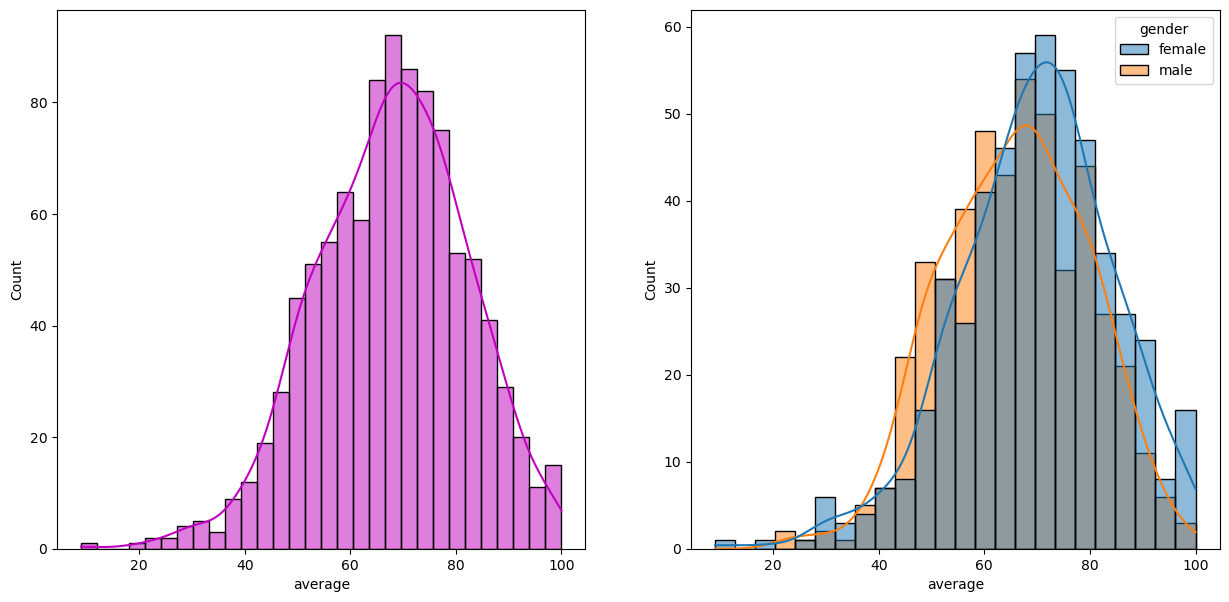

In [17]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'm')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

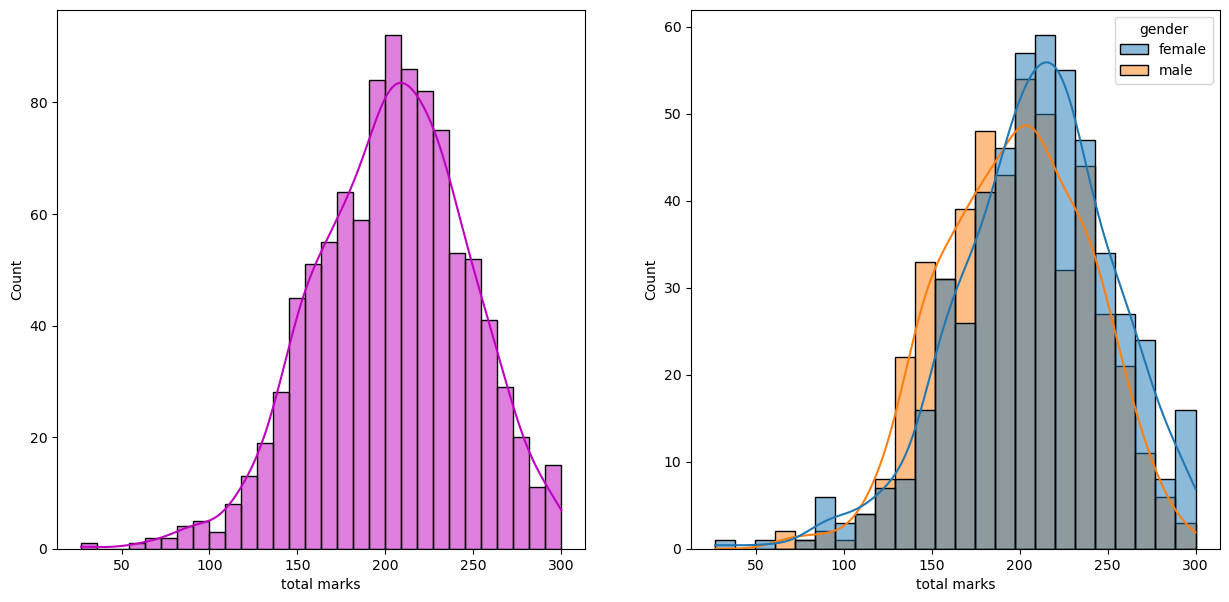

In [18]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total marks', bins = 30, kde = True, color = 'm')
plt.subplot(122)
sns.histplot(data = df, x = 'total marks', kde = True, hue = 'gender')
plt.show()

Females score is more than males

C:\Users\H P\AppData\Local\Temp\ipykernel_23464\1862934074.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\1862934074.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\1862934074.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


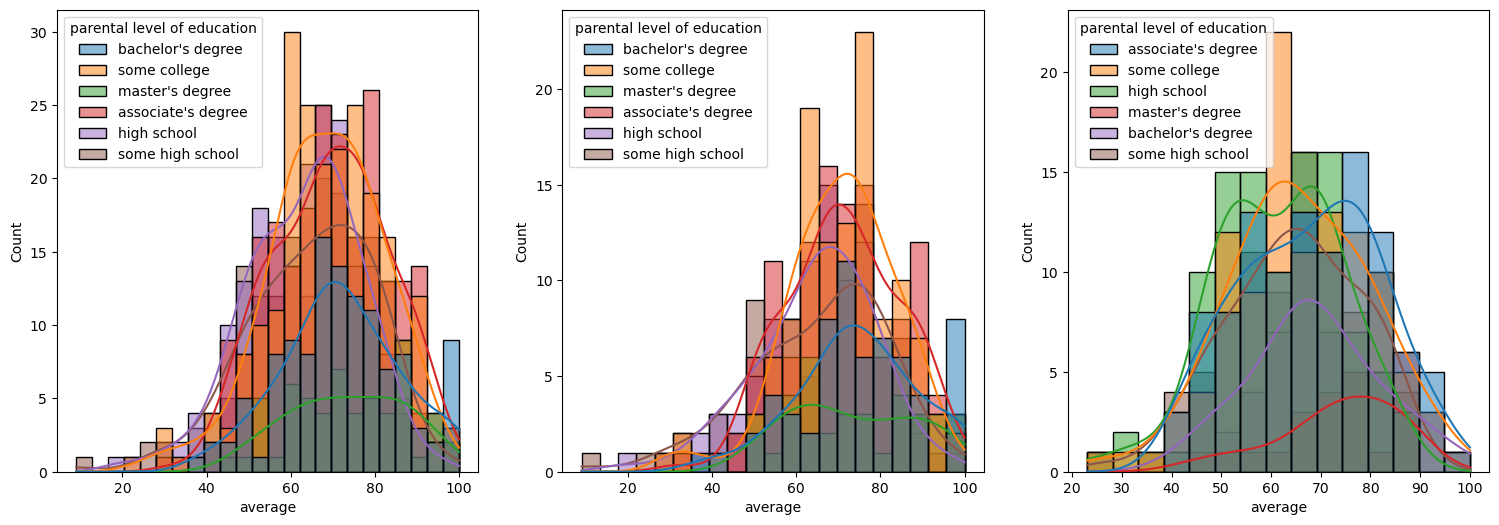

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

Parents degree cant help students to perform well in exams

C:\Users\H P\AppData\Local\Temp\ipykernel_23464\2266986935.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\2266986935.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\2266986935.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


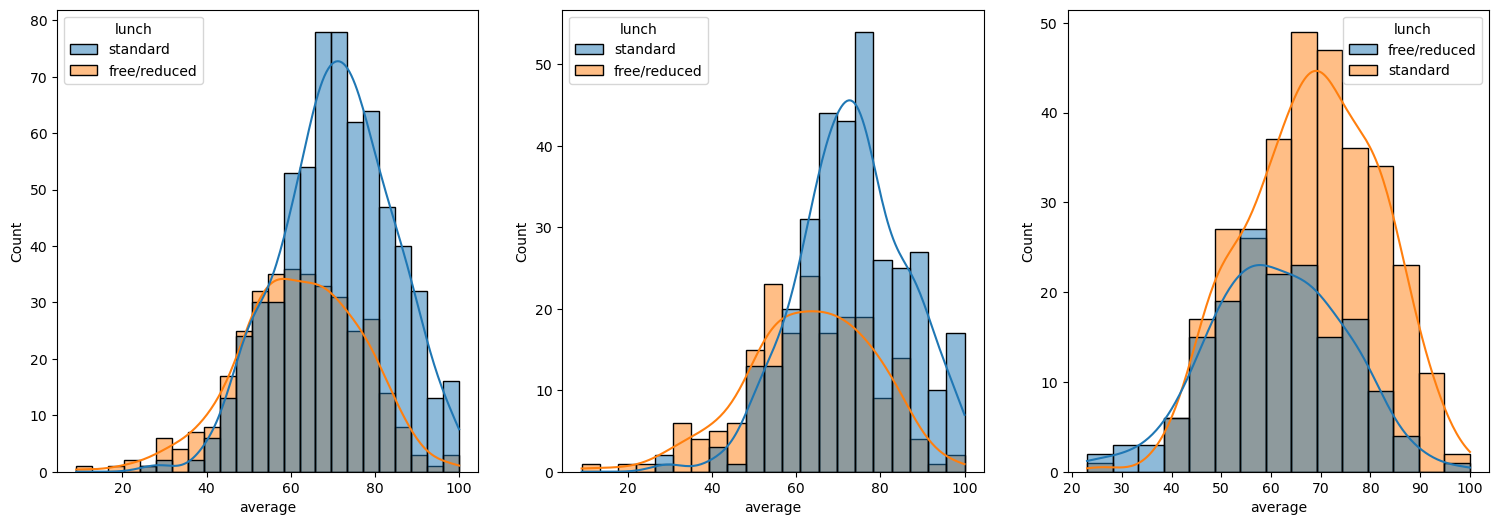

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

Standard lunch helps in perform well in exams

C:\Users\H P\AppData\Local\Temp\ipykernel_23464\3293909650.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\3293909650.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\H P\AppData\Local\Temp\ipykernel_23464\3293909650.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


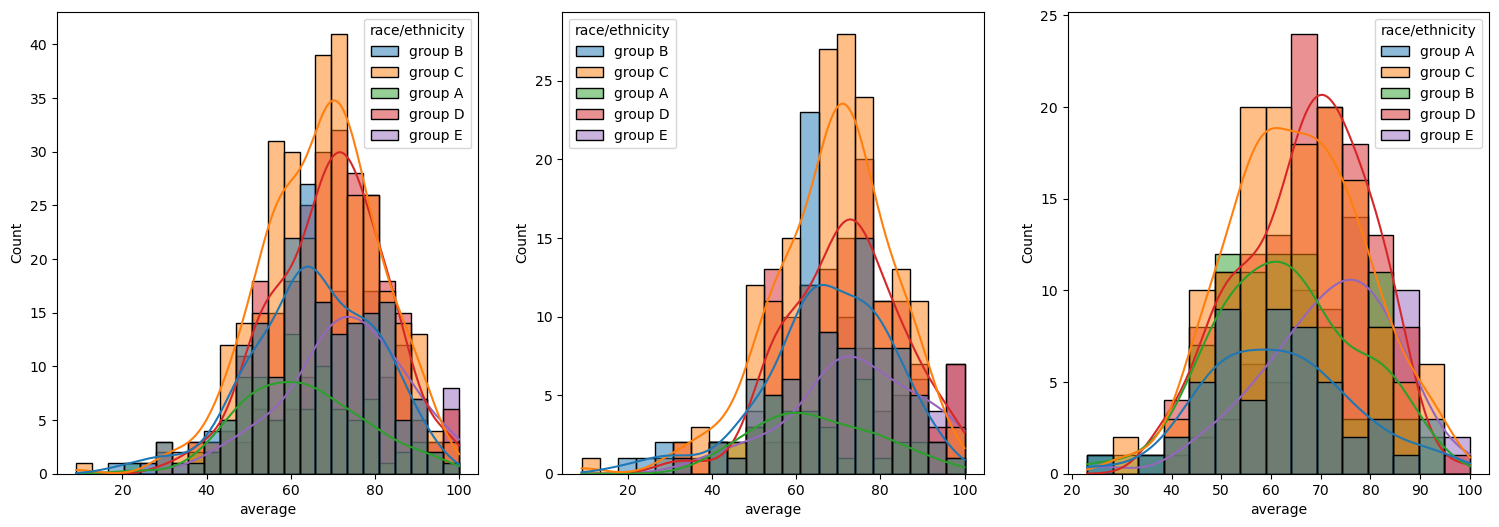

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

1. Students in group C and D dont perform well in exams
2. Students in group A and B perform well in exams

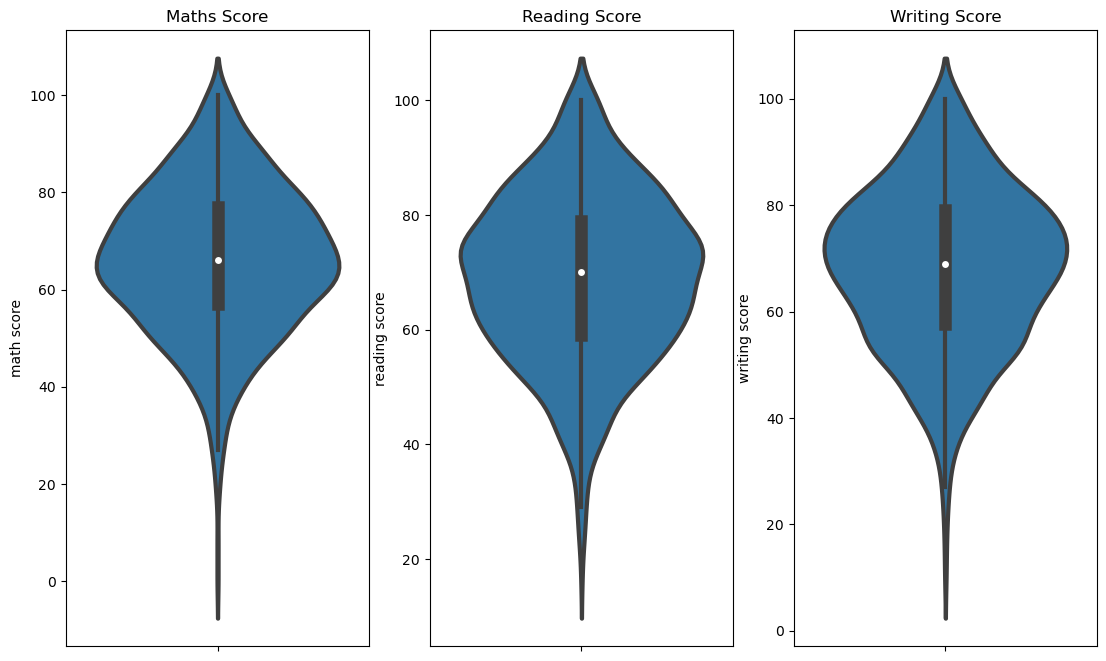

In [22]:
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title('Maths Score')
sns.violinplot(y = 'math score', data = df, linewidth = 3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y = 'reading score', data = df, linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y = 'writing score', data = df, linewidth = 3)
plt.show()

### Univariate Analysis

<Axes: xlabel='gender', ylabel='count'>

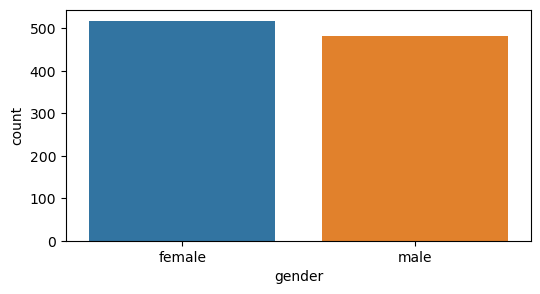

In [23]:
plt.subplots(1,figsize=(6,3))
sns.countplot(x='gender',data=df)

Gender Male and Female have almost same entries

<Axes: xlabel='race/ethnicity', ylabel='count'>

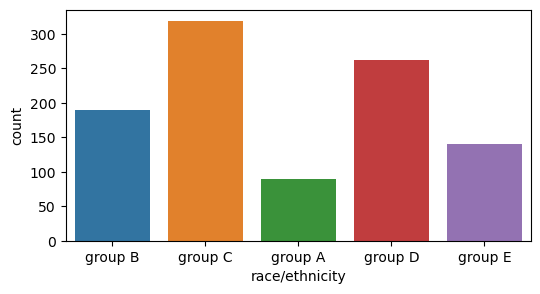

In [24]:
plt.subplots(1,figsize=(6,3))
sns.countplot(x='race/ethnicity',data=df)

1. Group C is having higher number of students
2. Group A is having very less students compared to all

<Axes: xlabel='parental level of education', ylabel='count'>

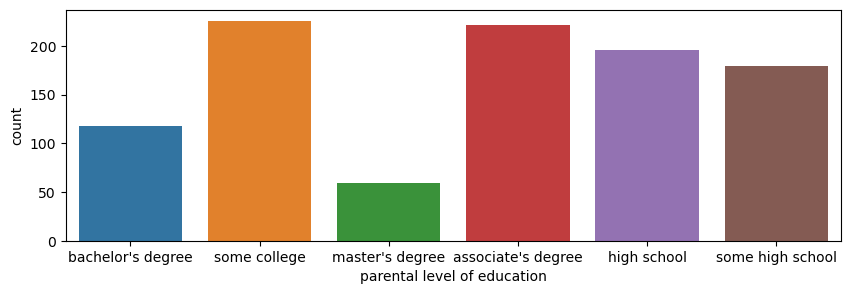

In [25]:
plt.subplots(1,figsize=(10,3))
sns.countplot(x='parental level of education',data=df)

1. Parents went to some college and have associate degree are almost equal in number.
2. Parents went to high school annd some school are almost equal in number.

<Axes: xlabel='lunch', ylabel='count'>

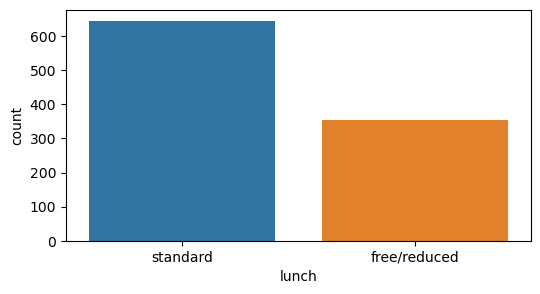

In [26]:
ax=plt.subplots(1,figsize=(6,3))
sns.countplot(x=df['lunch'],data=df)

<Axes: xlabel='test preparation course', ylabel='count'>

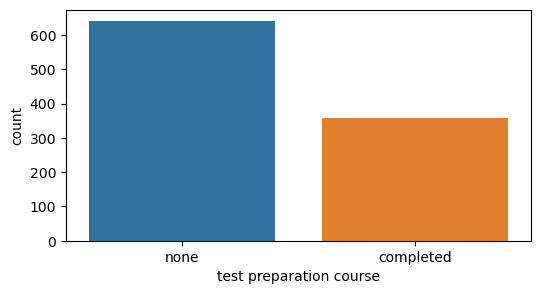

In [27]:
ax=plt.subplots(1,figsize=(6,3))
sns.countplot(x=df['test preparation course'],data=df)

Half of the students have not completed test preparation course

### Bivariate Analysis

C:\Users\H P\AppData\Local\Temp\ipykernel_23464\2821283623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


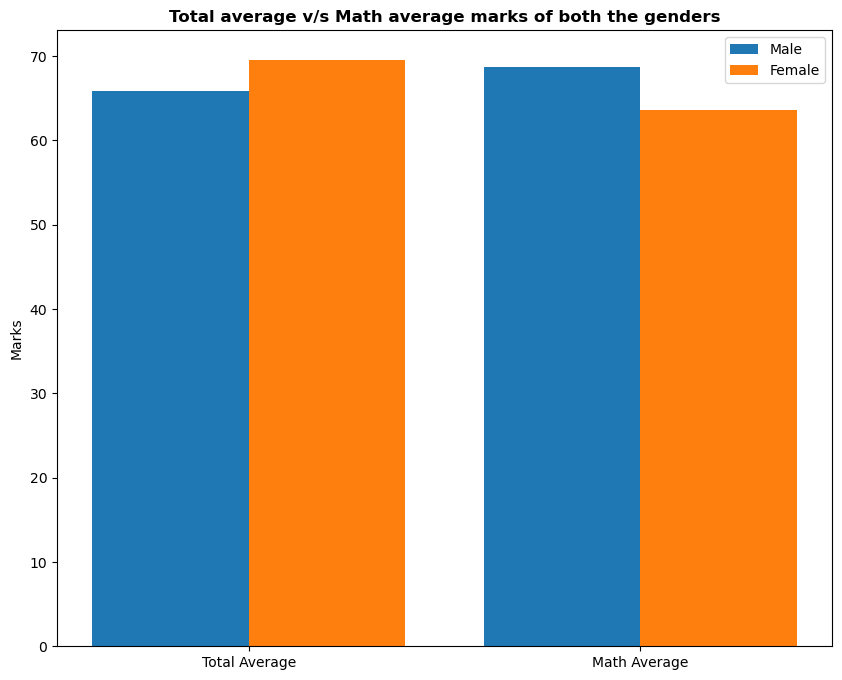

In [28]:
gender_group = df.groupby('gender').mean()
gender_group

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

1. on an average females have a better overall score than men.
2. whereas males have scored higher in Maths.

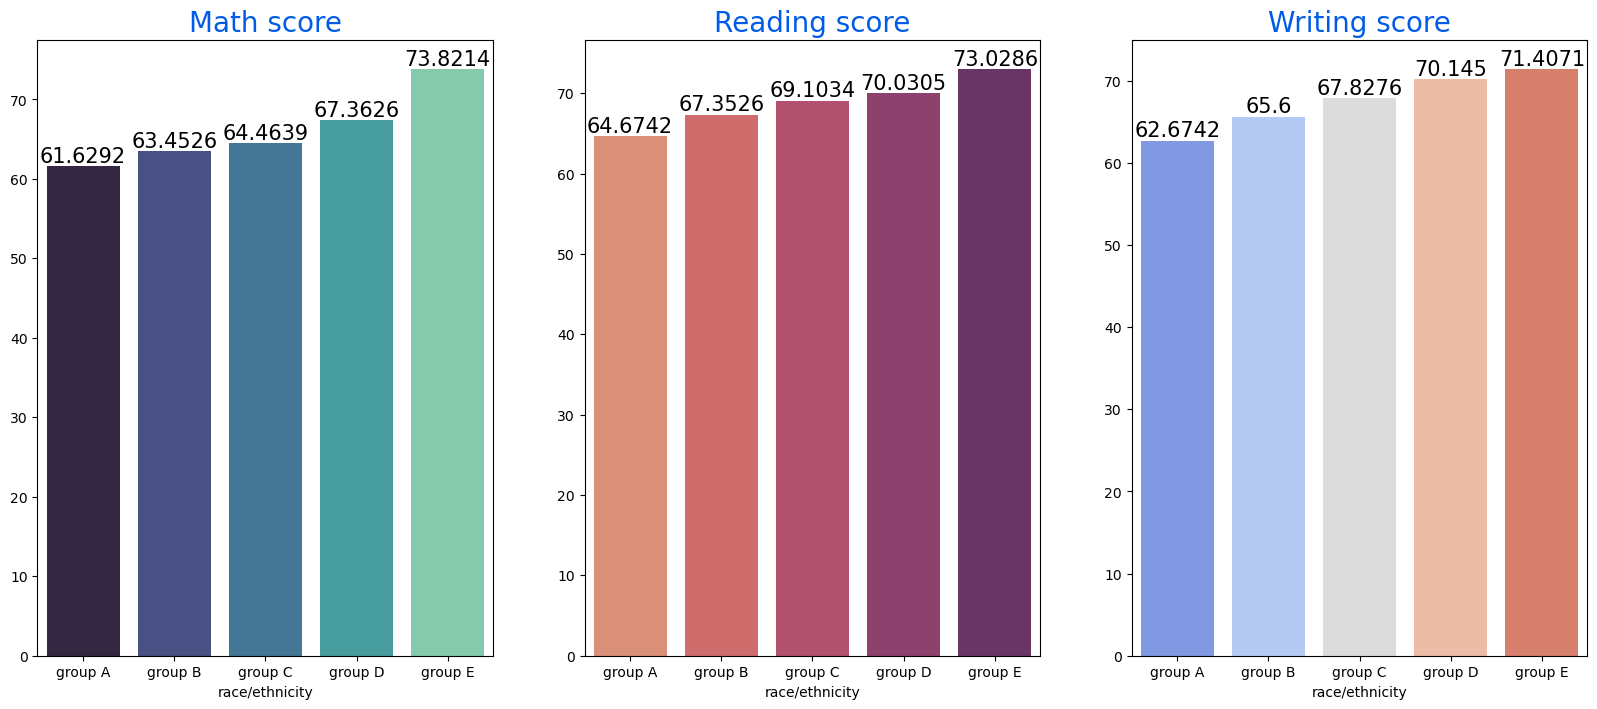

In [29]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects

C:\Users\H P\AppData\Local\Temp\ipykernel_23464\2035544548.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))


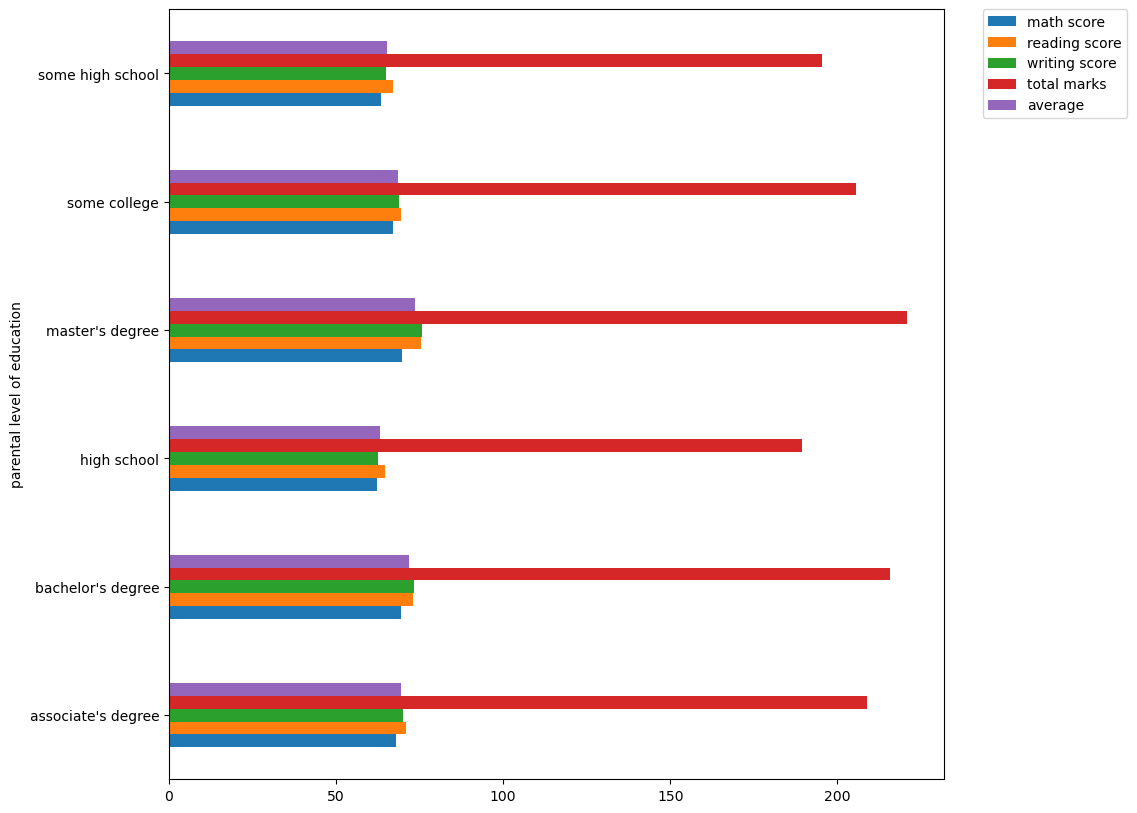

In [30]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

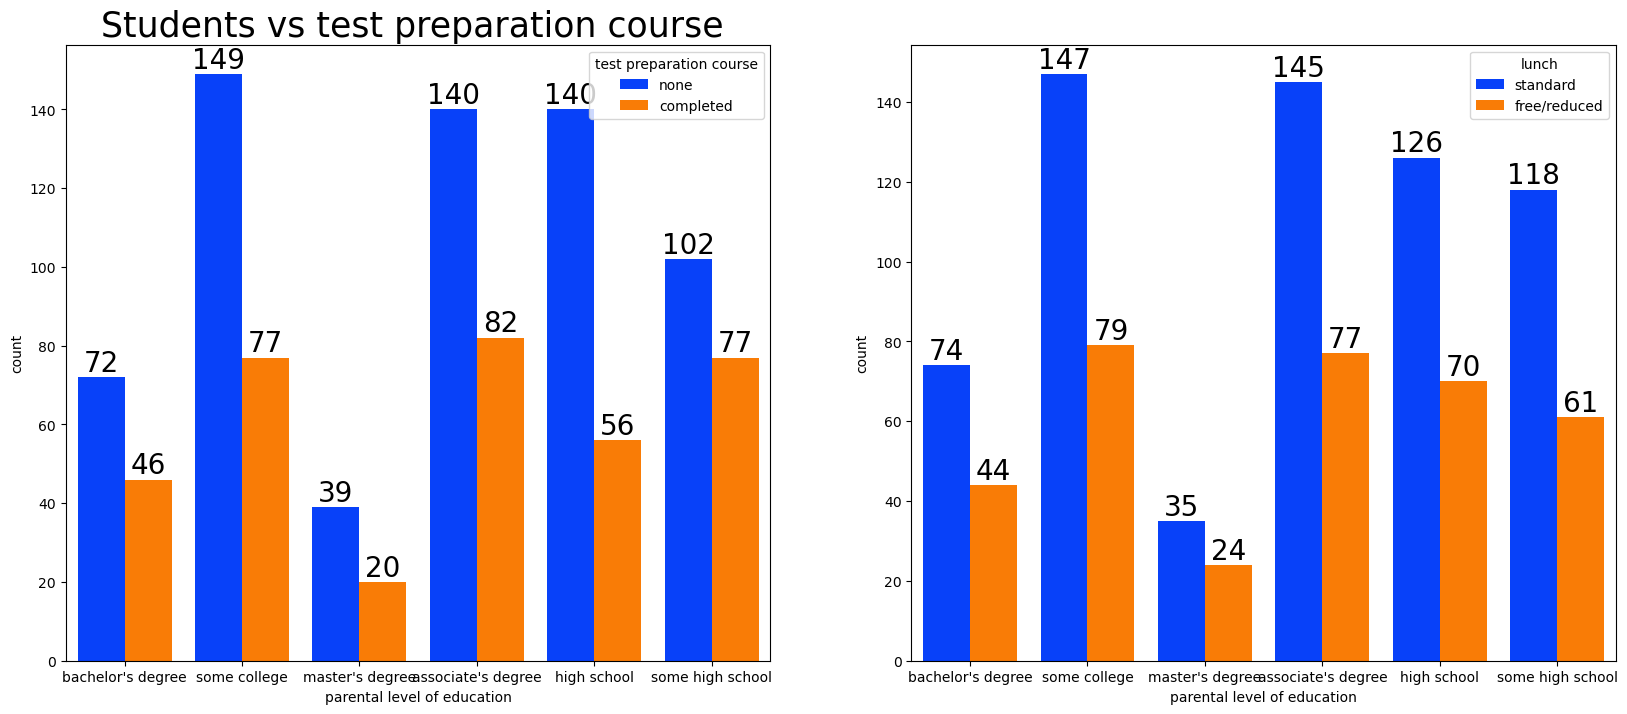

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing score'>

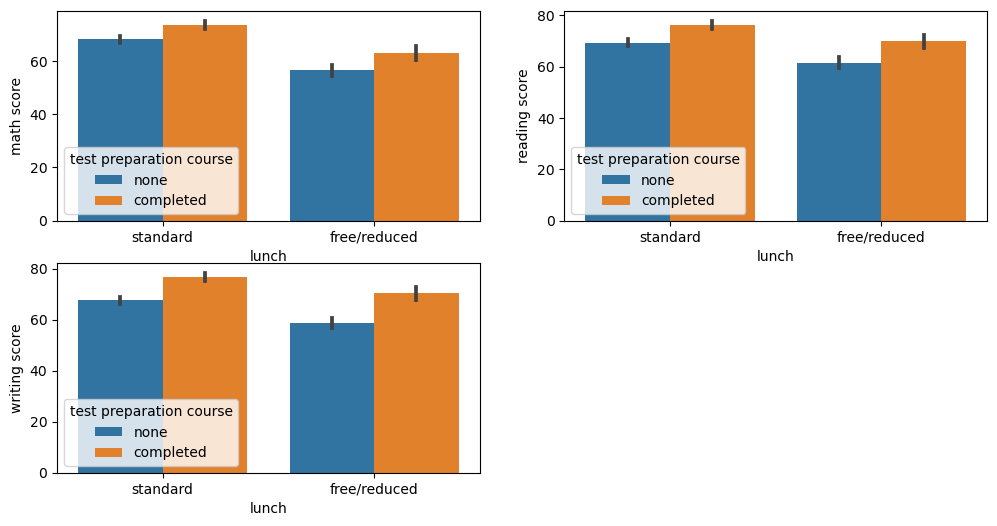

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Checking for outliers

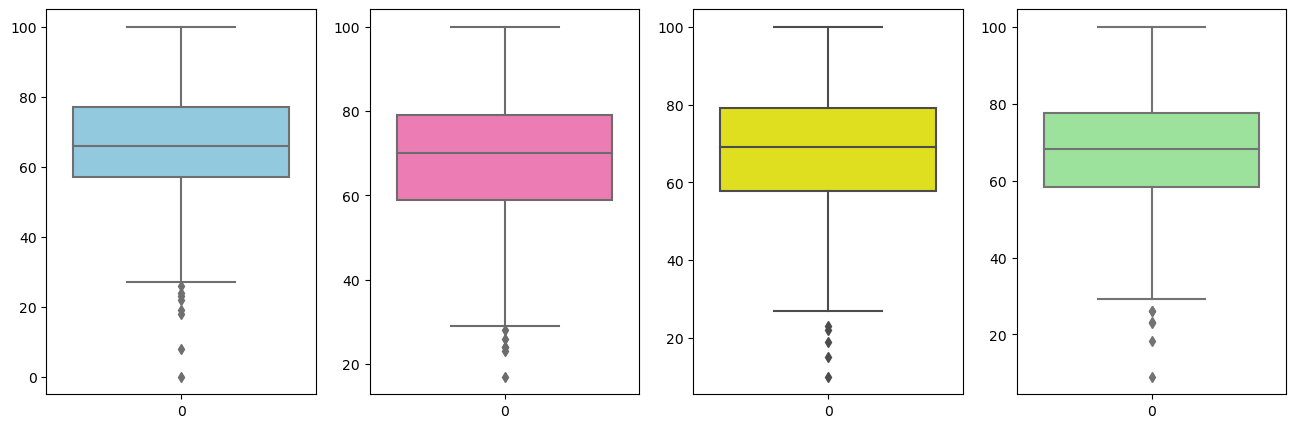

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

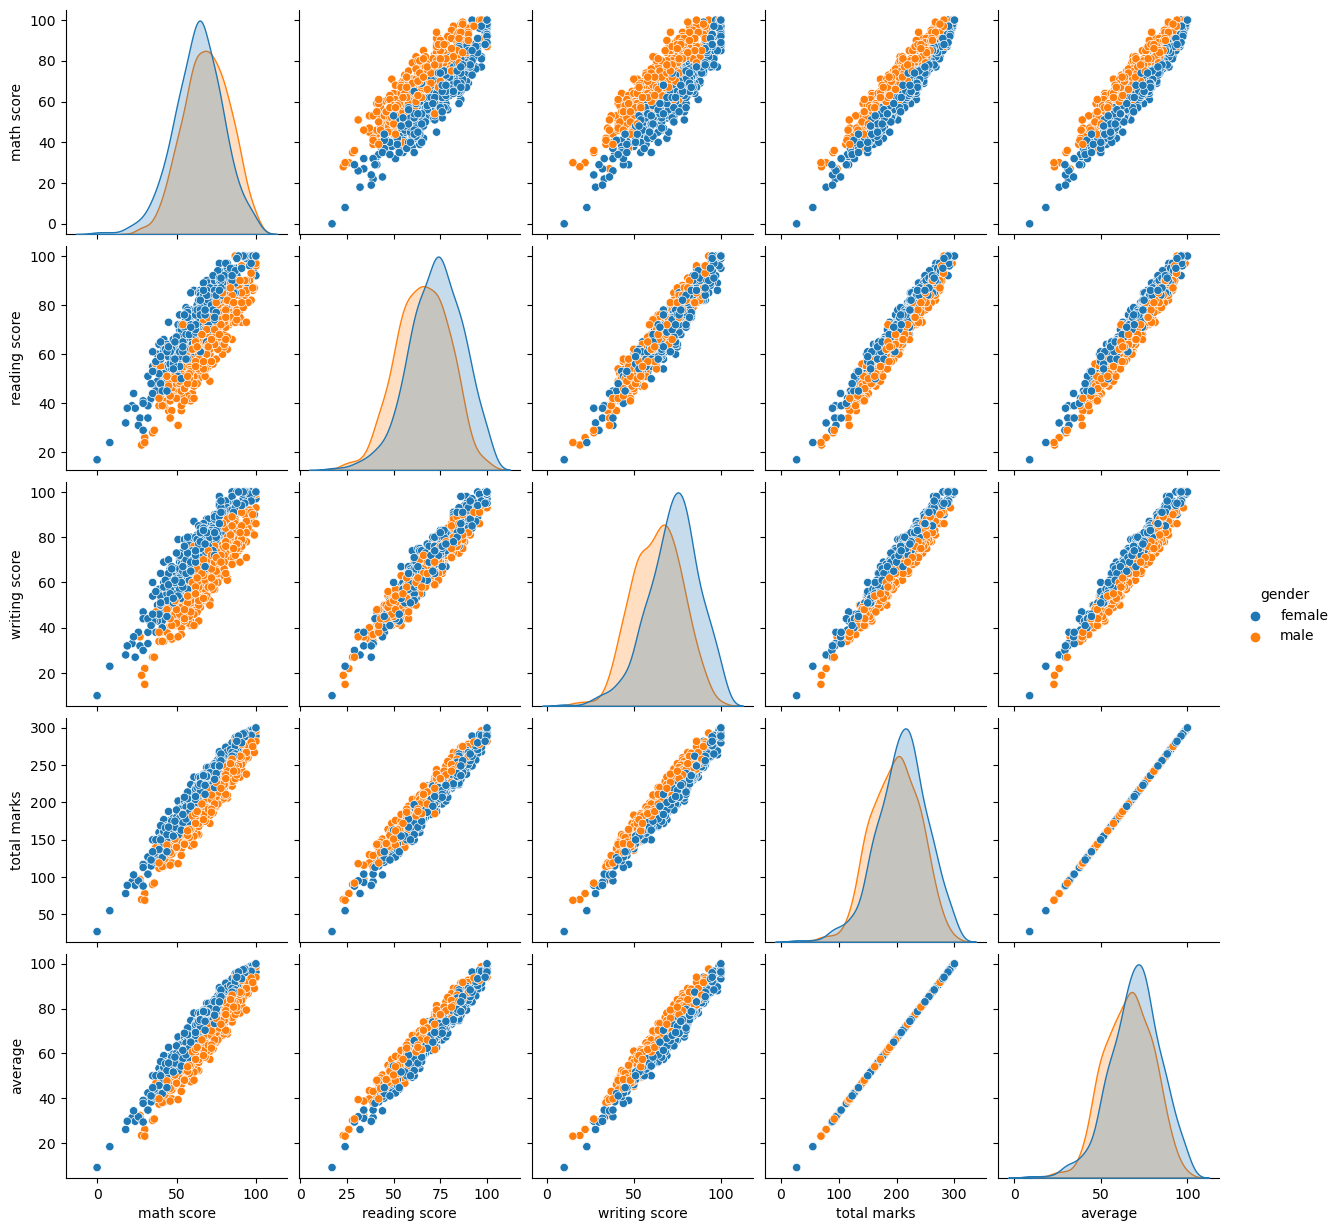

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()